In [1]:
import numpy as np
from numba import jit
import pints
import pints.plot
import pints_smol_moments_4_normalised_jit as toy
import matplotlib.pyplot as plt



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


true_parameters = [0.0002, 800]


times = np.linspace(0, 97, 9700)

org_values = model.simulate(true_parameters, times)

print(org_values)

print(org_values.shape)


[[8.00000000e+00 6.33600000e+03 9.84937059e+00 9.80101010e+01]
 [7.99360446e+00 6.31566516e+03 9.84936096e+00 9.80099758e+01]
 [7.98721913e+00 6.29541969e+03 9.84933216e+00 9.80096009e+01]
 ...
 [9.13413276e-01 4.21699567e+00 2.87342664e+00 1.09721621e+01]
 [9.13329849e-01 4.21573608e+00 2.87325033e+00 1.09710312e+01]
 [9.13246436e-01 4.21447698e+00 2.87307405e+00 1.09699005e+01]]
(9700, 4)


Perfect data

In [10]:
values = org_values
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 100],
    [0.001, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 20000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.AdaptiveCovarianceMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_63127/2375949012.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.1
1     6      0         0         0          0:00.1
2     9      0         0         0          0:00.1
3     12     0         0         0          0:00.1
20    63     0         0         0.0476     0:00.4
40    123    0         0.0244    0.0244     0:00.7
60    183    0         0.0164    0.0164     0:00.9
80    243    0         0.0123    0.0123     0:01.4
100   303    0         0.0099    0.0099     0:01.7
120   363    0.00826   0.00826   0.0165     0:02.1
140   423    0.00709   0.00709   0.0142     0:02.4
160   483    0.00621   0.00621   0.0124     0:02.7
180   543    0.00552   0.00552   0.011      0:03.1
Initial phase completed.
200   603    0.00498   0.00498   0.00995    0:03.4
220   663    0.0181    0.0136    0.0181     0:04.4
240   723    0.0207    0.0166    0.029      0:05.8
260   783   

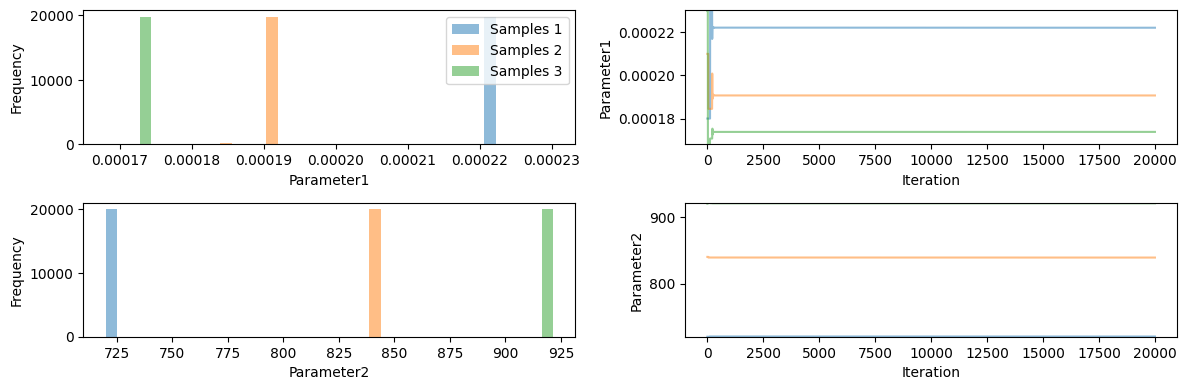

In [11]:
pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()

Multiplicative noise

In [6]:
noise = 1
values = org_values *(1 + noise * np.random.normal(0, 1, org_values.shape))
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 1],
    [0.001, 10000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 20000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.AdaptiveCovarianceMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_63127/3847217849.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_mcmc/_haario_bardenet_ac.py:89: UserWarning: The class `pints.AdaptiveCovarianceMCMC` is deprecated. Please use `pints.HaarioBardenetACMC` instead.
  warnings.warn(


Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.1
1     6      0         0         0          0:00.1
2     9      0         0         0          0:00.1
3     12     0         0         0          0:00.1
20    63     0         0         0          0:00.2
40    123    0         0         0          0:00.5
60    183    0.0164    0         0.0164     0:00.8
80    243    0.0123    0         0.0123     0:01.2
100   303    0.0099    0         0.0099     0:01.5
120   363    0.00826   0         0.00826    0:01.8
140   423    0.00709   0         0.00709    0:02.1
160   483    0.00621   0         0.00621    0:02.3
180   543    0.00552   0         0.00552    0:02.6
Initial phase completed.
200   603    0.00498   0         0.00498    0:02.7
220   663    0.0136    0.00905   0.00905    0:03.7
240   723    0.0249    0.0373    0.0207     0:04.8
260   783   

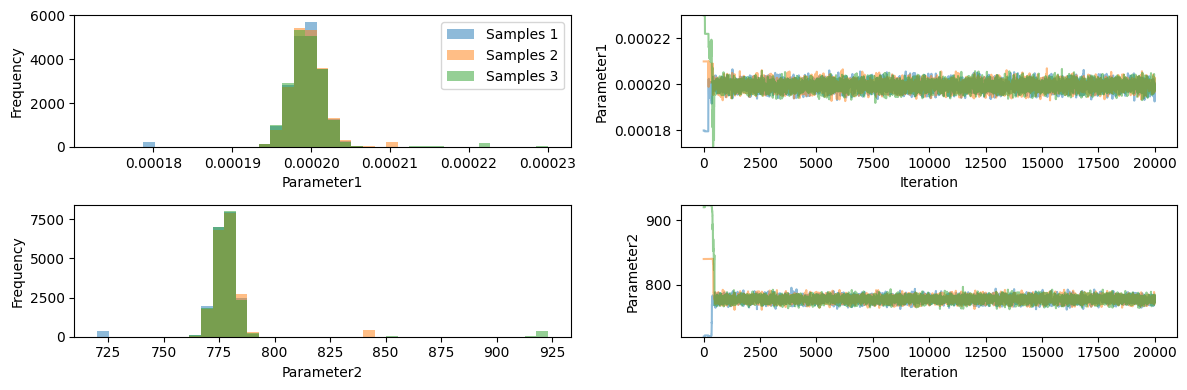

In [7]:
pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()

Additive noise

In [8]:
noise = 1
values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 1],
    [0.001, 10000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 20000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.AdaptiveCovarianceMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_63127/3358567714.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.1
1     6      0         0         0          0:00.1
2     9      0         0         0          0:00.2
3     12     0         0         0          0:00.2
20    63     0         0         0          0:00.4
40    123    0.0244    0         0.0244     0:00.9
60    183    0.0328    0         0.0164     0:01.3
80    243    0.0247    0         0.0123     0:01.5
100   303    0.0198    0         0.0099     0:01.8
120   363    0.0165    0         0.00826    0:02.2
140   423    0.0142    0         0.00709    0:02.5
160   483    0.0124    0         0.0124     0:02.9
180   543    0.011     0         0.011      0:03.2
Initial phase completed.
200   603    0.00995   0         0.00995    0:03.4
220   663    0.0136    0.00452   0.0226     0:04.6
240   723    0.0166    0.0166    0.029      0:05.9
260   783   

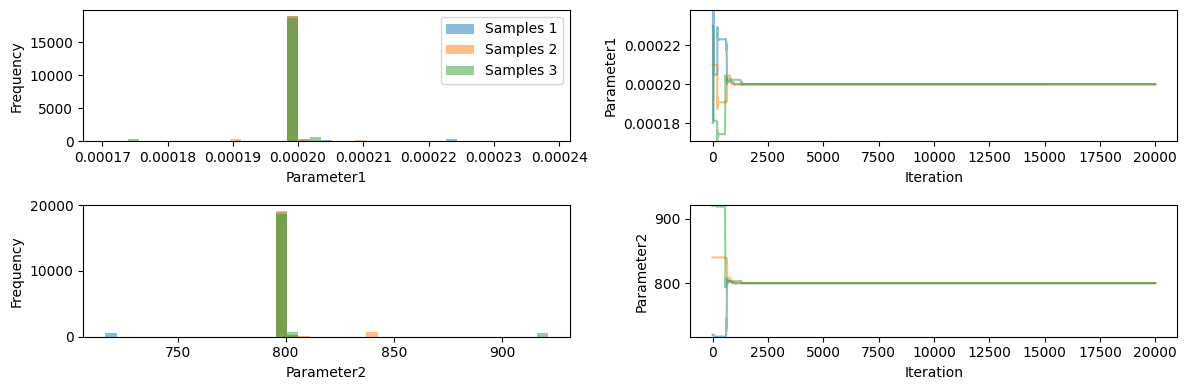

In [9]:
pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()